In [1]:
#This code takes the imdb movie reviews datatset and compares the accuracy of different classifiers (SVM, Naive Bayes, Random Forest) on a sentiment analysis model.

import sklearn
from sklearn.datasets import load_files
moviedir = r'movie_reviews'
import matplotlib.pyplot as plt
import seaborn as sns

# loading all files. 
movie = load_files(moviedir, shuffle=True)
# import CountVectorizer, nltk
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# Split data into training and test sets
from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(movie.data, movie.target, 
                                                          test_size = 0.20, random_state = 12)
# initialize CountVectorizer
movieVzer= CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=3000) 

# fit and tranform using training text 
docs_train_counts = movieVzer.fit_transform(docs_train)
from sklearn.feature_extraction.text import TfidfTransformer
# Convert raw frequency counts into TF-IDF values
movieTfmer = TfidfTransformer()
docs_train_tfidf = movieTfmer.fit_transform(docs_train_counts)


PermissionError: [Errno 13] Permission denied: 'movie_reviews\\neg\\.ipynb_checkpoints'

In [66]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
docs_train_tfidf.shape

(1600, 3000)

In [67]:
# Using the fitted vectorizer and transformer, tranform the test data
docs_test_counts = movieVzer.transform(docs_test)
docs_test_tfidf = movieTfmer.transform(docs_test_counts)

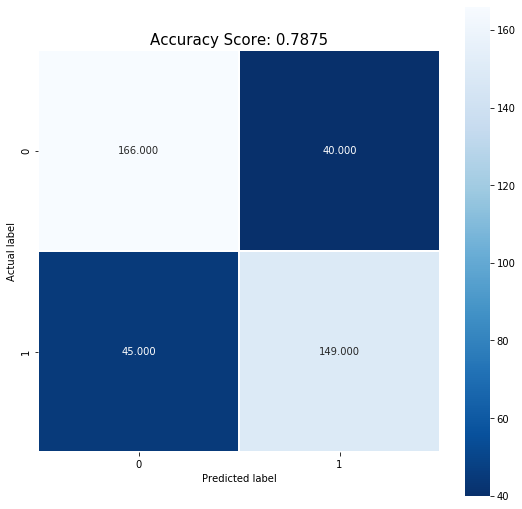

In [68]:
# We will use Multinominal Naive Bayes as our model
from sklearn.naive_bayes import MultinomialNB
# Train a Multimoda Naive Bayes classifier. Again, we call it "fitting"
clf = MultinomialNB()
clf.fit(docs_train_tfidf, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
# Predict the Test set results, find accuracy
y_pred = clf.predict(docs_test_tfidf)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
score1=clf.score(docs_test_tfidf,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

In [69]:
# very short and fake movie reviews
reviews_new = ['Covid 19 is the best','I hate covid','I love spending time at home','Why cant the lockdown end',' I am okay','The amount of covid cases is scary'
              ,'I want more covid cases','I want the lockdown to end','I am so bored','I am happy ']

reviews_new_counts = movieVzer.transform(reviews_new)         # turn text into count vector
reviews_new_tfidf = movieTfmer.transform(reviews_new_counts)  # turn into tfidf vector
# have classifier make a prediction
pred = clf.predict(reviews_new_tfidf)
# print out results
for review, category in zip(reviews_new, pred):
    print('%r => %s' % (review, movie.target_names[category]))

'Covid 19 is the best' => pos
'I hate covid' => neg
'I love spending time at home' => pos
'Why cant the lockdown end' => neg
' I am okay' => neg
'The amount of covid cases is scary' => neg
'I want more covid cases' => pos
'I want the lockdown to end' => neg
'I am so bored' => neg
'I am happy ' => pos


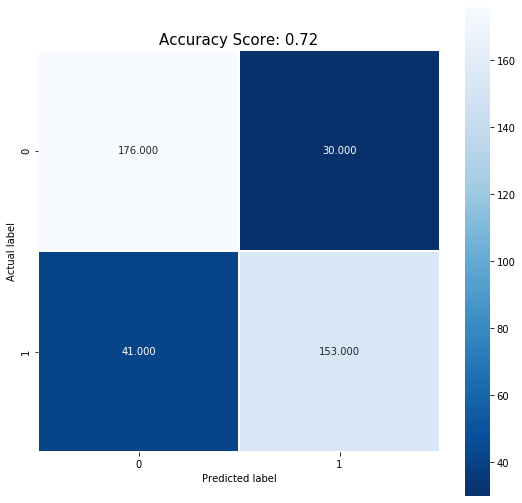

In [52]:

from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(docs_train_tfidf, y_train)

# Predict the Test set results, find accuracy
y_pred = clf2.predict(docs_test_tfidf)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2
score2=clf2.score(docs_test_tfidf,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);

[[181  25]
 [ 60 134]]
0.6775


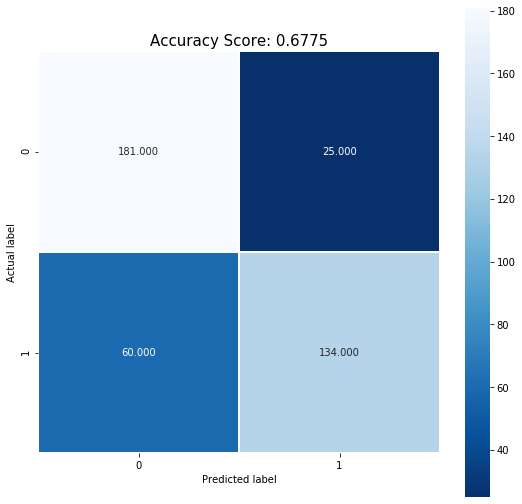

In [53]:
# Now ready to build a classifier. 
# We will use Multinominal Naive Bayes as our model
from sklearn.linear_model import SGDClassifier
# Train a 
clf3 = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
clf3.fit(docs_train_tfidf, y_train)

# Predict the Test set results, find accuracy
y_pred = clf3.predict(docs_test_tfidf)
sklearn.metrics.accuracy_score(y_test, y_pred)
0.7825
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)
score3=clf3.score(docs_test_counts,y_test)
cm=confusion_matrix(y_test,y_pred)

print(score3)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score3)
plt.title(all_sample_title, size = 15);

[[149  57]
 [ 32 162]]
0.5325


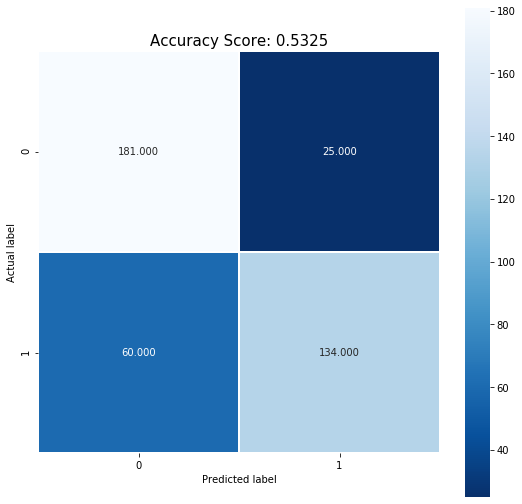

In [54]:
from sklearn.linear_model import LogisticRegression

clf4 = LogisticRegression()
clf4.fit(docs_train_tfidf, y_train)

# Predict the Test set results, find accuracy
y_pred = clf4.predict(docs_test_tfidf)
sklearn.metrics.accuracy_score(y_test, y_pred)
0.7825
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)
score4=clf4.score(docs_test_counts,y_test)


print(score4)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score4)
plt.title(all_sample_title, size = 15);

In [64]:
# very short and fake movie reviews
reviews_new = ['Covid 19 is the best','I hate covid','I love spending time at home','Why cant the lockdown end',' I am okay','The amount of covid cases is scary'
              ,'I want more covid cases','I want the lockdown to end','I am so bored','I am happy ']

reviews_new_counts = movieVzer.transform(reviews_new)         # turn text into count vector
reviews_new_tfidf = movieTfmer.transform(reviews_new_counts)  # turn into tfidf vector
# have classifier make a prediction
pred = clf.predict(reviews_new_tfidf)
# print out results
for review, category in zip(reviews_new, pred):
    print('%r => %s' % (review, movie.target_names[category]))

'Covid 19 is the best' => pos
'I hate covid' => neg
'I love spending time at home' => neg
'Why cant the lockdown end' => neg
' I am okay' => neg
'The amount of covid cases is scary' => neg
'I want more covid cases' => neg
'I want the lockdown to end' => neg
'I am so bored' => neg
'I am happy ' => neg
